In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Retrieving and Preparing the Data

## Task 1.1: Retrieving Data

In [2]:
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
heart.shape

(299, 13)

## Task 1.2: Preparing Data

### Check for missing values and inappropriate data types

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Convert those categorical features to 'category' data type

In [5]:
heart1 = heart.copy()
heart1.iloc[:,[1,3,5,9,10,12]] = heart.iloc[:,[1,3,5,9,10,12]].astype('category')
heart1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

### Check for data entry errors in categorical features

In [6]:
for col in [1,3,5,9,10,12]:
    print(heart1.iloc[:,col].value_counts())

0    170
1    129
Name: anaemia, dtype: int64
0    174
1    125
Name: diabetes, dtype: int64
0    194
1    105
Name: high_blood_pressure, dtype: int64
1    194
0    105
Name: sex, dtype: int64
0    203
1     96
Name: smoking, dtype: int64
0    203
1     96
Name: DEATH_EVENT, dtype: int64


In [7]:
heart1.duplicated().sum()

0

# Task 2: Data Exploration

Descriptive Statistics for numeric columns

In [8]:
heart1.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


Descriptive Statistics for 'category' columns

In [9]:
heart1.describe(include='category')

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,0,0,0,1,0,0
freq,170,174,194,194,203,203


In [10]:
numerical = heart.iloc[:,[0,2,4,6,7,8,11]].columns
categorical = heart1.select_dtypes('category').columns
print(numerical)
print(categorical)

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')
Index(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',
       'DEATH_EVENT'],
      dtype='object')


#### Expore each numerical columns

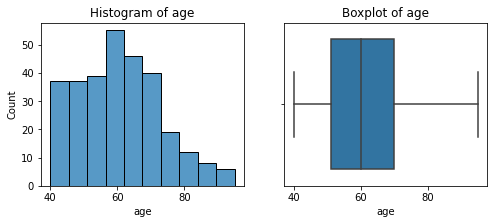

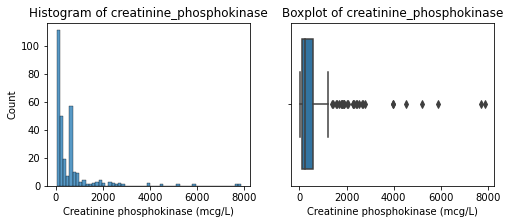

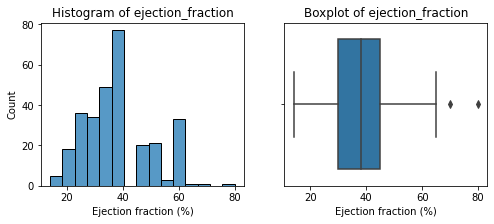

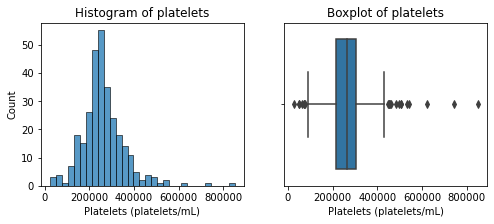

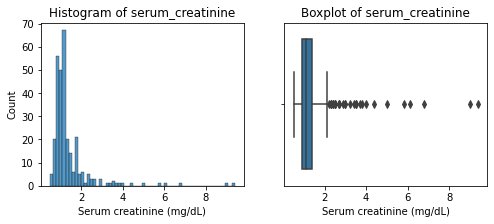

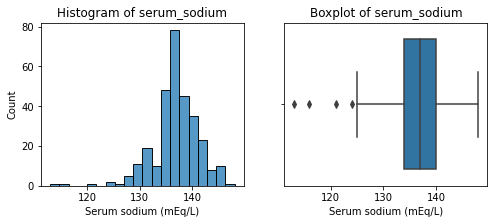

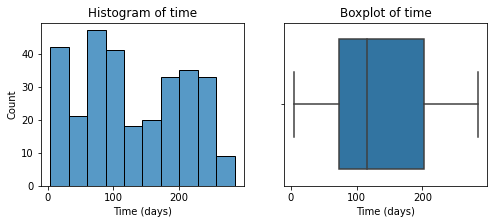

In [11]:
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    sns.histplot(data=heart, x=col, ax=ax[0])
    ax[0].set_title("Histogram of %s" %col)
    if col == 'creatinine_phosphokinase':
        ax[0].set_xlabel('Creatinine phosphokinase (mcg/L)')
    elif col == 'ejection_fraction':
        ax[0].set_xlabel('Ejection fraction (%)')
    elif col == 'platelets':
        ax[0].set_xlabel('Platelets (platelets/mL)')
    elif col == 'serum_creatinine':
        ax[0].set_xlabel('Serum creatinine (mg/dL)')
    elif col == 'serum_sodium':
        ax[0].set_xlabel('Serum sodium (mEq/L)')
    elif col == 'time':
        ax[0].set_xlabel('Time (days)')
    sns.boxplot(data=heart, x=col, ax=ax[1])
    ax[1].set_title("Boxplot of %s" %col)
    if col == 'creatinine_phosphokinase':
        ax[1].set_xlabel('Creatinine phosphokinase (mcg/L)')
    elif col == 'ejection_fraction':
        ax[1].set_xlabel('Ejection fraction (%)')
    elif col == 'platelets':
        ax[1].set_xlabel('Platelets (platelets/mL)')
    elif col == 'serum_creatinine':
        ax[1].set_xlabel('Serum creatinine (mg/dL)')
    elif col == 'serum_sodium':
        ax[1].set_xlabel('Serum sodium (mEq/L)')
    elif col == 'time':
        ax[1].set_xlabel('Time (days)');

#### Expore each categorical columns

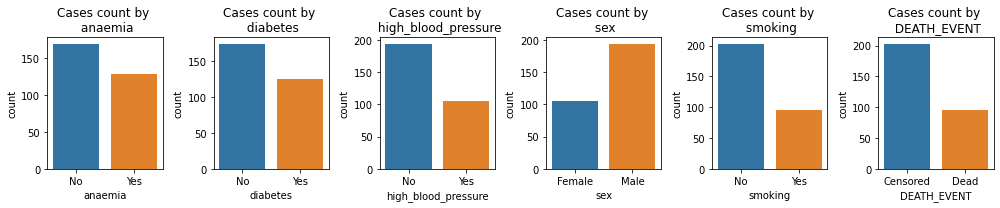

In [12]:
plt.figure(figsize=(14, 3))
for i, col in enumerate(categorical):
    ax = plt.subplot(1, 6, i+1)
    sns.countplot(data=heart1, x=col, ax=ax)
    ax.set_title("Cases count by \n %s" %col)
    if col == 'sex':
        ax.set_xticklabels(['Female', 'Male'])
    elif col == 'DEATH_EVENT':
        ax.set_xticklabels(['Censored', 'Dead'])
    else:
        ax.set_xticklabels(['No', 'Yes'])
plt.tight_layout()

#### Relationship between each pair of categorical columns in entire dataset

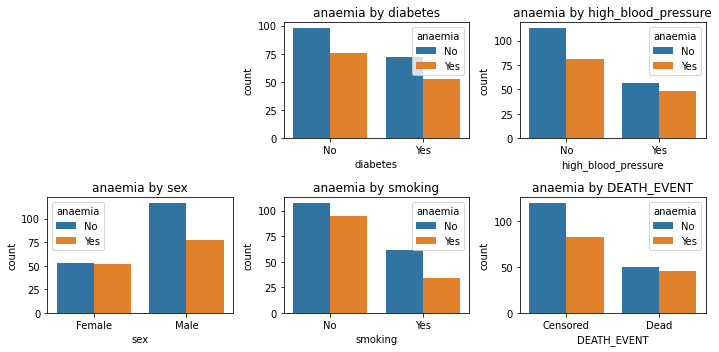

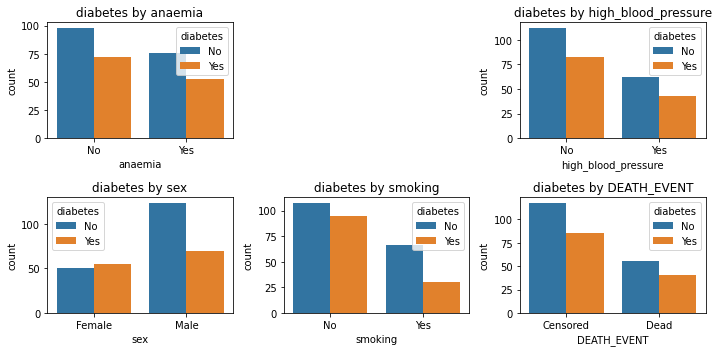

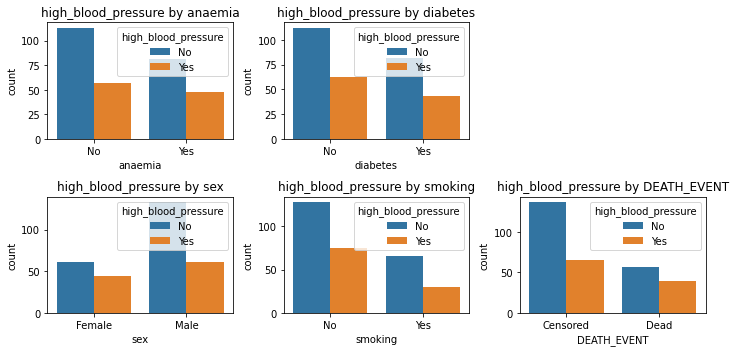

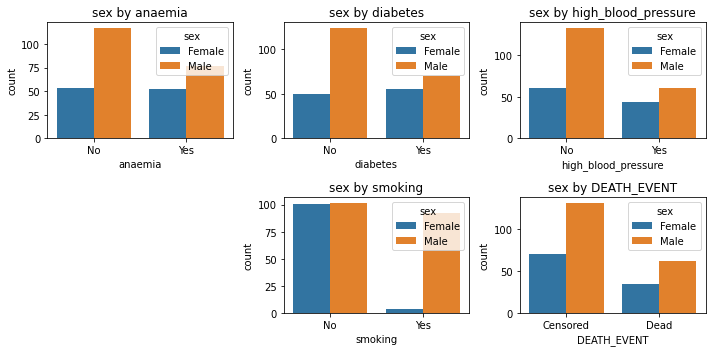

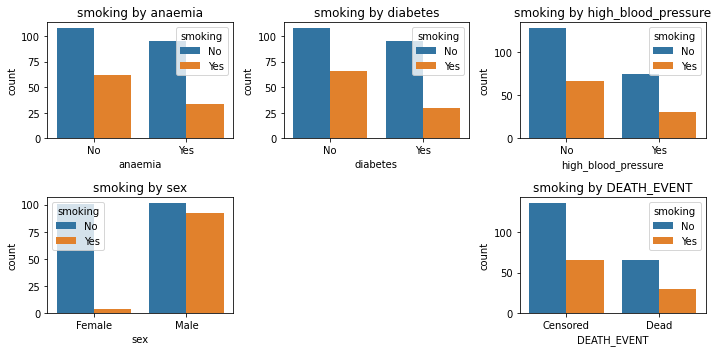

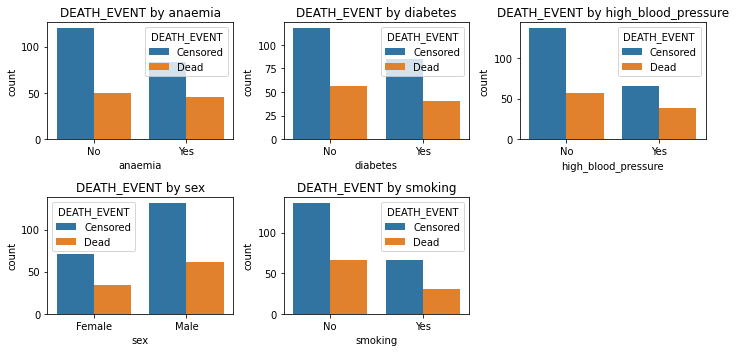

In [13]:
for catecol in categorical:
    plt.figure(figsize=(10,5))
    for i, col in enumerate(categorical):
        if col != catecol:
            ax = plt.subplot(2, 3, i+1)
            sns.countplot(data=heart1, x=col, hue=catecol, ax=ax)
            ax.set_title(label="%s" %catecol + " by %s" %col)
            if col == 'sex':
                ax.set_xticklabels(['Female', 'Male'])
            elif col == 'DEATH_EVENT':
                ax.set_xticklabels(['Censored', 'Dead'])
            else:
                ax.set_xticklabels(['No', 'Yes'])
            if catecol == 'sex':
                ax.legend(title=catecol, labels=['Female', 'Male'])
            elif catecol == 'DEATH_EVENT':
                ax.legend(title=catecol, labels=['Censored', 'Dead'])
            else:
                ax.legend(title=catecol, labels=['No', 'Yes'])
            plt.tight_layout()

#### Relationship between Death event and each of other categorical features (In percentage of death event group )

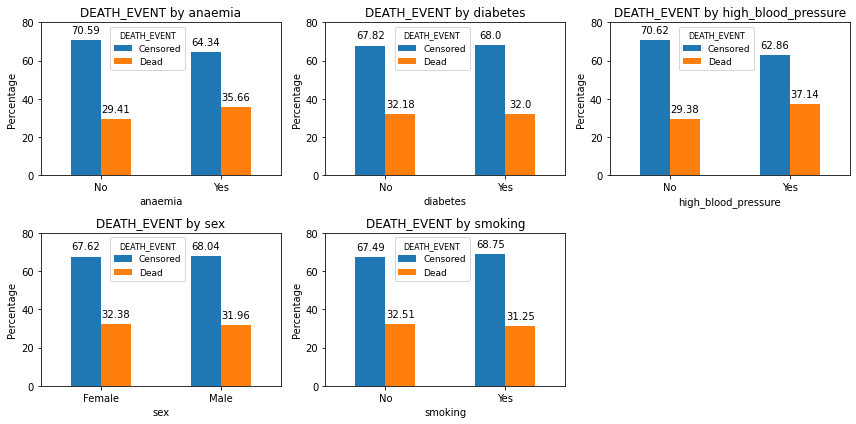

In [14]:
plt.figure(figsize=(12,6))
for i, col in enumerate(categorical):
    if col != 'DEATH_EVENT':
        df = pd.crosstab(index=heart1.loc[:, col], columns=heart1.DEATH_EVENT, normalize='index').round(4)*100
        ax = plt.subplot(2, 3, i+1)
        df.plot(kind='bar',ax=ax, rot=0)
        ax.set_title(label="DEATH_EVENT by %s" %col)
        for p in ax.patches:
            ax.annotate(np.round(p.get_height(),decimals=2),                             
                    (p.get_x()+p.get_width()/2., p.get_height()),                              
                    ha='center',                              
                    va='center',                              
                    xytext=(0, 10),                               
                    textcoords='offset points')
        if col == 'sex':
            ax.set_xticklabels(['Female', 'Male'])
        elif col == 'DEATH_EVENT':
            ax.set_xticklabels(['Censored', 'Dead'])
        else:
            ax.set_xticklabels(['No', 'Yes'])
        ax.set_ylabel('Percentage')
        ax.set_ylim(ymax=80)
        ax.legend(title='DEATH_EVENT', title_fontsize=8, labels=['Censored', 'Dead'], 
                  loc='upper right', bbox_to_anchor=(0.62, 1), prop={'size': 9})
        plt.tight_layout()

#### Relationship between each pair of a numerical column and a categorical column in entire dataset

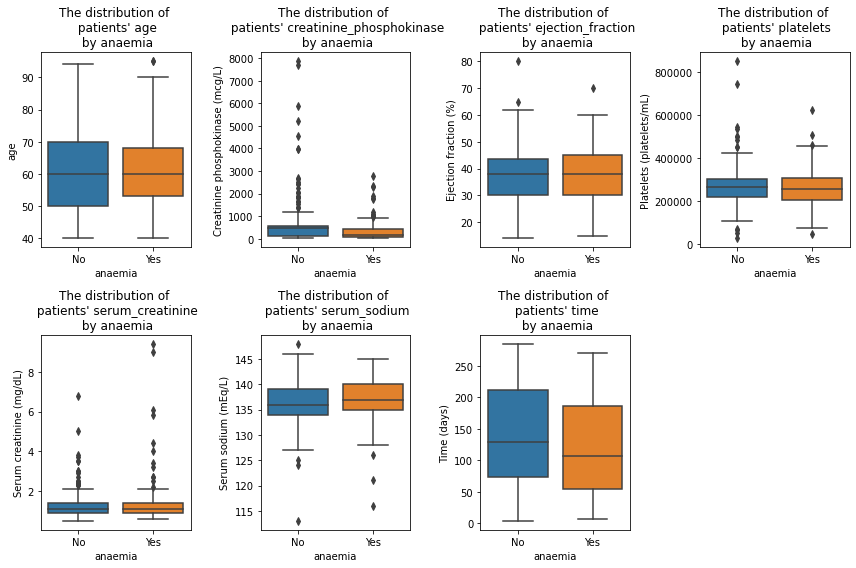

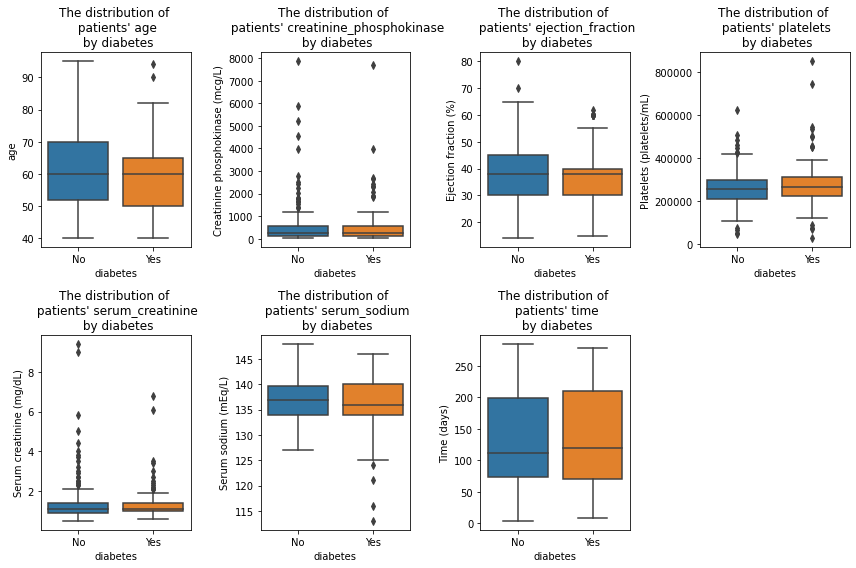

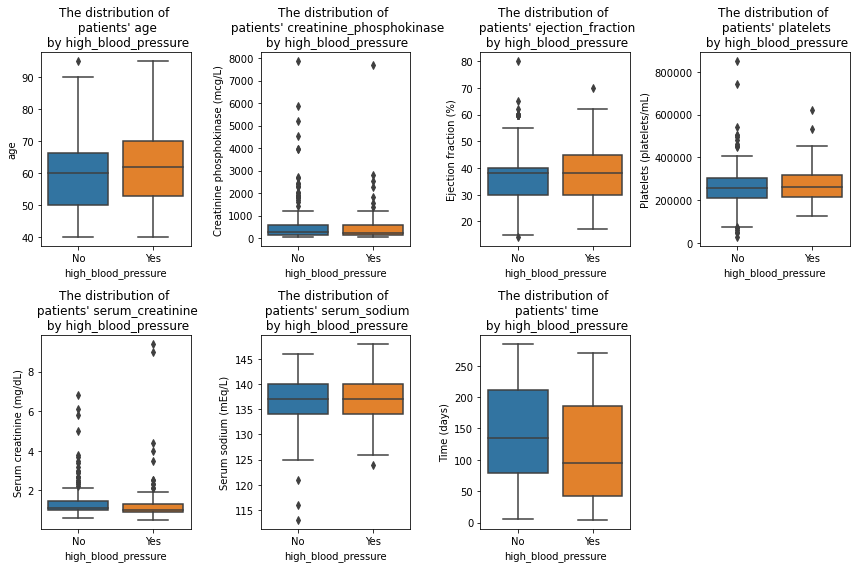

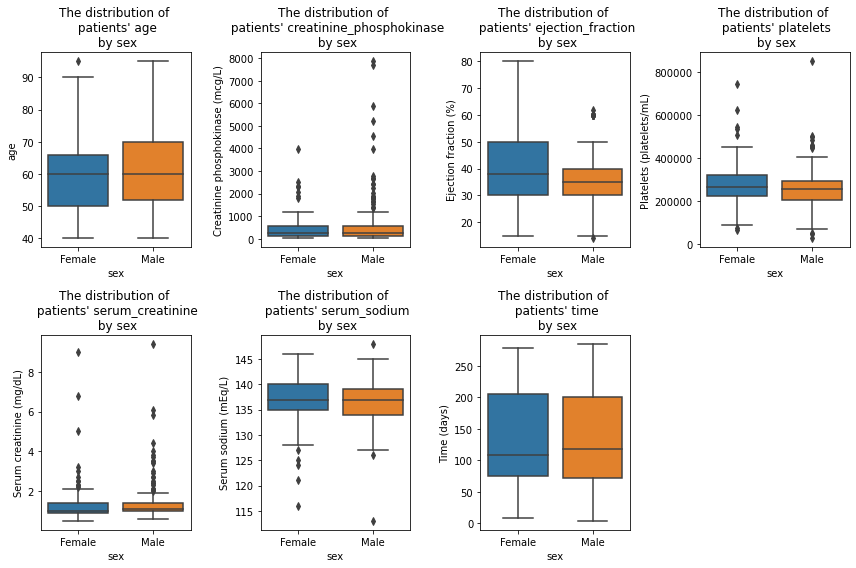

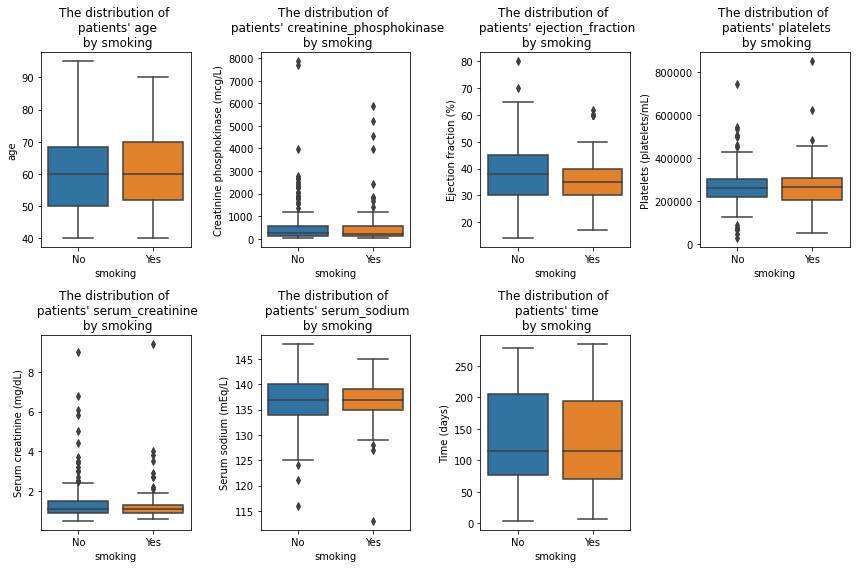

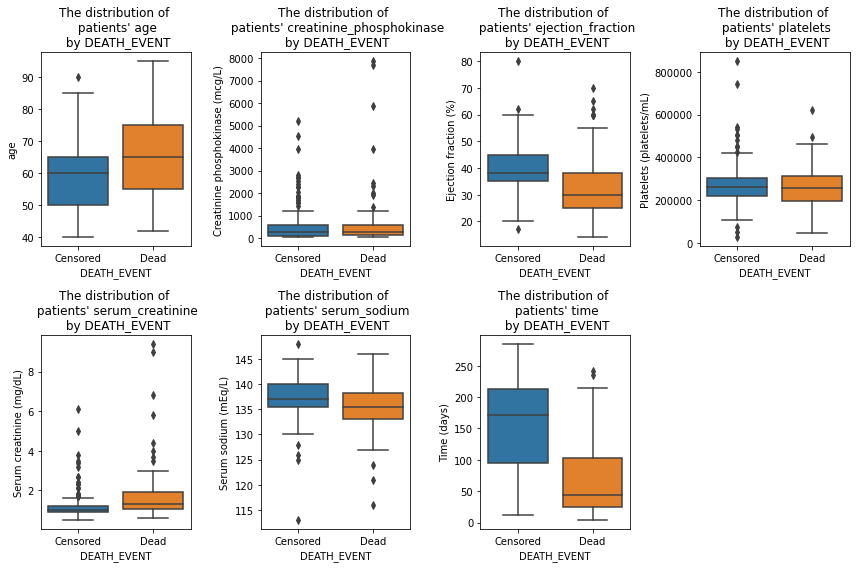

In [15]:
for catecol in categorical:
    plt.figure(figsize=(12, 8))
    for i, numcol in enumerate(numerical):
        ax = plt.subplot(2, 4, i+1)
        sns.boxplot(data=heart1, y=numcol, x=catecol, ax=ax)
        ax.set_title(label="The distribution of \n patients' %s" %numcol + "\n by %s" %catecol)
        # add measurement unit to y axis
        if numcol == 'creatinine_phosphokinase':
            ax.set_ylabel('Creatinine phosphokinase (mcg/L)')
        elif numcol == 'ejection_fraction':
            ax.set_ylabel('Ejection fraction (%)')
        elif numcol == 'platelets':
            ax.set_ylabel('Platelets (platelets/mL)')
        elif numcol == 'serum_creatinine':
            ax.set_ylabel('Serum creatinine (mg/dL)')
        elif numcol == 'serum_sodium':
            ax.set_ylabel('Serum sodium (mEq/L)')
        elif numcol == 'time':
            ax.set_ylabel('Time (days)')
        # Relabel for all categories
        if catecol == 'sex':
            ax.set_xticklabels(['Female', 'Male'])
        elif catecol == 'DEATH_EVENT':
            ax.set_xticklabels(['Censored', 'Dead'])
        else:
            ax.set_xticklabels(['No', 'Yes'])
        plt.tight_layout()

#### Relationship between each pair of numrical columns in entire dataset

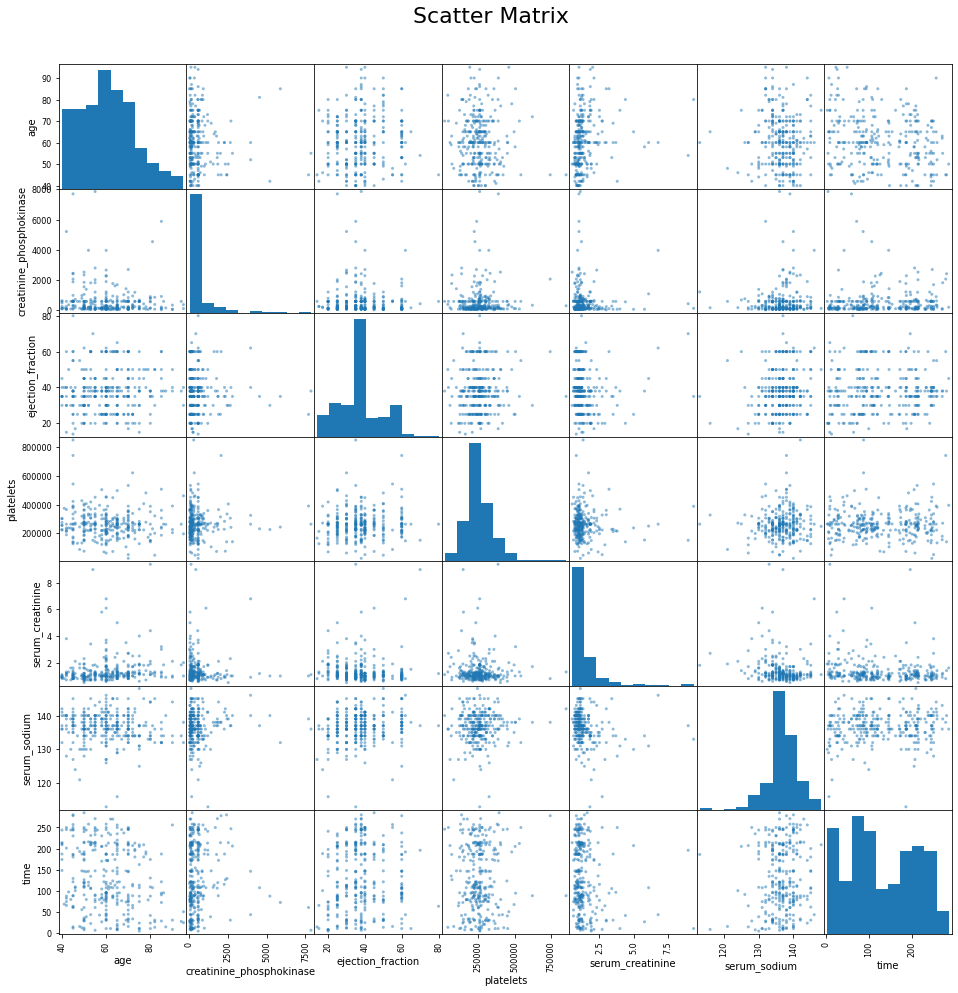

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(heart1,figsize=(16,16),diagonal='hist')
plt.suptitle('Scatter Matrix',  y=0.93, fontsize = 22)
plt.show()

# Task 3: Data Modelling

### Partitioning Dataset into the Set of Descriptive Features (X) and the Target Feature (y)

In [17]:
X = heart1.drop(columns=['time','DEATH_EVENT'])
y = heart1['DEATH_EVENT']
X.shape, y.shape

((299, 11), (299,))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

## 1. k-Nearest Neighbor Classifier

### Spliting Data into Training and Test Sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state=0)

In [20]:
X_train.shape

(209, 11)

In [21]:
X_test.shape

(90, 11)

In [22]:
y_train.shape

(209,)

In [23]:
y_test.shape

(90,)

### Fitting a k-Nearest Neighbor Classifier on full data set - default parameters

In [24]:
clf = KNeighborsClassifier(5)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print('Model evaluation for k-Nearest Neighbor classifier on full dataset \nwith default parameters (n_neighbors=5, weights=\'uniform\', p=2): \n')
print('Confusion matrix: \n', cm)
print('Accuracy:', clf.score(X_test, y_test))
print("Recall:", recall_score(y_test, predicted))
print('Classification report: \n', classification_report(y_test, predicted))

Model evaluation for k-Nearest Neighbor classifier on full dataset 
with default parameters (n_neighbors=5, weights='uniform', p=2): 

Confusion matrix: 
 [[51 10]
 [27  2]]
Accuracy: 0.5888888888888889
Recall: 0.06896551724137931
Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.84      0.73        61
           1       0.17      0.07      0.10        29

    accuracy                           0.59        90
   macro avg       0.41      0.45      0.42        90
weighted avg       0.50      0.59      0.53        90



In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)
ls =[]
for k, (train_index, test_index) in enumerate(rskf.split(X,y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    fit = clf.fit(X_train, y_train)
    predicted = fit.predict(X_test)
    ls.append(recall_score(y_test, predicted))
    print("[fold {0}] recall score: {1:.5f}".format(k, recall_score(y_test, predicted)))    
print("Mean cross-validation recall score after stratified \n5-fold cross-validation with 3 repetitions:", np.mean(ls).round(2))

[fold 0] recall score: 0.35000
[fold 1] recall score: 0.21053
[fold 2] recall score: 0.15789
[fold 3] recall score: 0.15789
[fold 4] recall score: 0.26316
[fold 5] recall score: 0.15000
[fold 6] recall score: 0.26316
[fold 7] recall score: 0.10526
[fold 8] recall score: 0.10526
[fold 9] recall score: 0.15789
[fold 10] recall score: 0.35000
[fold 11] recall score: 0.10526
[fold 12] recall score: 0.21053
[fold 13] recall score: 0.31579
[fold 14] recall score: 0.26316
Mean cross-validation recall score after stratified 
5-fold cross-validation with 3 repetitions: 0.21


### KNN Parameter Tuning and Cross Validation full data set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=0)

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=8)

In [28]:
model_KNN = KNeighborsClassifier()
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
              'weights' : ['distance'],
              'p': [1, 2, 5]}

perf_metric = 'recall'
gs_KNN = GridSearchCV(estimator=model_KNN, 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1, 
                      scoring=perf_metric,
                      return_train_score=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, [2, 3, 4, 9, 7, 10]], y,
                                                    test_size = 0.3, stratify = y, random_state=0)

In [30]:
gs_KNN.fit(X_train, y_train);

Fitting 15 folds for each of 21 candidates, totalling 315 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    2.6s finished


In [31]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['mean_recall'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN

,n_neighbors,p,weights,mean_recall,metric
0,1,1,distance,0.418681,Manhattan
1,1,2,distance,0.423443,Euclidean
2,1,5,distance,0.423443,Minkowski
3,2,1,distance,0.418681,Manhattan
4,2,2,distance,0.423443,Euclidean
5,2,5,distance,0.423443,Minkowski
6,3,1,distance,0.378388,Manhattan
7,3,2,distance,0.393040,Euclidean
8,3,5,distance,0.412821,Minkowski
9,4,1,distance,0.398535,Manhattan


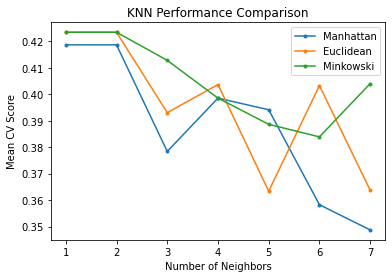

In [32]:
for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['mean_recall'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

In [33]:
clf = KNeighborsClassifier(n_neighbors=2, weights='distance', p=2)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print('Confusion matrix: \n', cm)
print('Accuracy:', clf.score(X_test, y_test))
print("Recall:", recall_score(y_test, predicted))
print('Classification report: \n', classification_report(y_test, predicted))

Confusion matrix: 
 [[47 14]
 [23  6]]
Accuracy: 0.5888888888888889
Recall: 0.20689655172413793
Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.77      0.72        61
           1       0.30      0.21      0.24        29

    accuracy                           0.59        90
   macro avg       0.49      0.49      0.48        90
weighted avg       0.55      0.59      0.57        90



### Hill Climbing Feature Selection

random_state=0

In [34]:
from sklearn.utils import shuffle

col_num = X.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X.iloc[:, new_Ind].copy()
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.3, stratify = y, random_state=0)
    clf = KNeighborsClassifier(n_neighbors=2, weights='distance', p=2)
    fit = clf.fit(X_train, y_train)
    predicted = fit.predict(X_test)
    cur_Score = recall_score(y_test, predicted)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Recall score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        
print("There are " + str(len(new_Ind)) + " features selected:", new_Ind)
X.columns[new_Ind].values

Recall score with 1 selected features: 0.13793103448275862
Recall score with 2 selected features: 0.1724137931034483
Recall score with 3 selected features: 0.20689655172413793
Recall score with 4 selected features: 0.20689655172413793
Recall score with 5 selected features: 0.20689655172413793
Recall score with 6 selected features: 0.20689655172413793
Recall score with 7 selected features: 0.20689655172413793
Recall score with 8 selected features: 0.20689655172413793
Recall score with 9 selected features: 0.20689655172413793
Recall score with 10 selected features: 0.20689655172413793
Recall score with 11 selected features: 0.20689655172413793
There are 11 features selected: [2, 3, 4, 9, 1, 6, 0, 7, 10, 8, 5]


array(['creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'sex',
       'anaemia', 'platelets', 'age', 'serum_creatinine', 'smoking',
       'serum_sodium', 'high_blood_pressure'], dtype=object)

random_state=2

In [35]:
from sklearn.utils import shuffle

col_num = X.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X.iloc[:, new_Ind].copy()
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.3, stratify = y, random_state=2)
    clf = KNeighborsClassifier(n_neighbors=2, weights='distance', p=2)
    fit = clf.fit(X_train, y_train)
    predicted = fit.predict(X_test)
    cur_Score = recall_score(y_test, predicted)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Recall score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        
print("There are " + str(len(new_Ind)) + " features selected:", new_Ind)
X.columns[new_Ind].values

Recall score with 1 selected features: 0.20689655172413793
Recall score with 2 selected features: 0.20689655172413793
Recall score with 3 selected features: 0.41379310344827586
Recall score with 4 selected features: 0.4482758620689655
Recall score with 5 selected features: 0.4482758620689655
Recall score with 6 selected features: 0.4827586206896552
Recall score with 7 selected features: 0.4827586206896552
Recall score with 8 selected features: 0.4827586206896552
Recall score with 9 selected features: 0.4827586206896552
There are 9 features selected: [2, 3, 4, 9, 1, 0, 7, 10, 5]


array(['creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'sex',
       'anaemia', 'age', 'serum_creatinine', 'smoking',
       'high_blood_pressure'], dtype=object)

random_state=5

In [36]:
from sklearn.utils import shuffle

col_num = X.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X.iloc[:, new_Ind].copy()
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.3, stratify = y, random_state=5)
    clf = KNeighborsClassifier(n_neighbors=2, weights='distance', p=2)
    fit = clf.fit(X_train, y_train)
    predicted = fit.predict(X_test)
    cur_Score = recall_score(y_test, predicted)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Recall score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        
print("There are " + str(len(new_Ind)) + " features selected:", new_Ind)
X.columns[new_Ind].values

Recall score with 1 selected features: 0.3448275862068966
Recall score with 2 selected features: 0.3448275862068966
Recall score with 3 selected features: 0.3448275862068966
Recall score with 4 selected features: 0.3793103448275862
Recall score with 5 selected features: 0.3793103448275862
Recall score with 6 selected features: 0.3793103448275862
There are 6 features selected: [2, 9, 1, 0, 7, 10]


array(['creatinine_phosphokinase', 'sex', 'anaemia', 'age',
       'serum_creatinine', 'smoking'], dtype=object)

random_state=8

In [37]:
from sklearn.utils import shuffle

col_num = X.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X.iloc[:, new_Ind].copy()
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.3, stratify = y, random_state=8)
    clf = KNeighborsClassifier(n_neighbors=2, weights='distance', p=2)
    fit = clf.fit(X_train, y_train)
    predicted = fit.predict(X_test)
    cur_Score = recall_score(y_test, predicted)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Recall score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        
print("There are " + str(len(new_Ind)) + " features selected:", new_Ind)
X.columns[new_Ind].values

Recall score with 1 selected features: 0.2413793103448276
Recall score with 2 selected features: 0.2413793103448276
Recall score with 3 selected features: 0.3793103448275862
Recall score with 4 selected features: 0.3793103448275862
Recall score with 5 selected features: 0.3793103448275862
Recall score with 6 selected features: 0.3793103448275862
Recall score with 7 selected features: 0.3793103448275862
Recall score with 8 selected features: 0.3793103448275862
There are 8 features selected: [2, 3, 4, 9, 1, 0, 10, 5]


array(['creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'sex',
       'anaemia', 'age', 'smoking', 'high_blood_pressure'], dtype=object)

random_state=15

In [38]:
from sklearn.utils import shuffle

col_num = X.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X.iloc[:, new_Ind].copy()
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.3, stratify = y, random_state=15)
    clf = KNeighborsClassifier(n_neighbors=2, weights='distance', p=2)
    fit = clf.fit(X_train, y_train)
    predicted = fit.predict(X_test)
    cur_Score = recall_score(y_test, predicted)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Recall score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        
print("There are " + str(len(new_Ind)) + " features selected:", new_Ind)
X.columns[new_Ind].values

Recall score with 1 selected features: 0.4482758620689655
Recall score with 2 selected features: 0.4482758620689655
Recall score with 3 selected features: 0.4482758620689655
Recall score with 4 selected features: 0.4482758620689655
Recall score with 5 selected features: 0.4482758620689655
Recall score with 6 selected features: 0.4482758620689655
There are 6 features selected: [2, 4, 9, 1, 7, 10]


array(['creatinine_phosphokinase', 'ejection_fraction', 'sex', 'anaemia',
       'serum_creatinine', 'smoking'], dtype=object)

### KNN Parameter Tuning & cross validation for dataset of 6 selected features from Hill Climbing

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, [2, 4, 9, 1, 7, 10]], y,
                                                    test_size = 0.3, stratify = y, random_state=0)

In [40]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=8)

In [41]:
model_KNN = KNeighborsClassifier()
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
              'weights' : ['distance'],
              'p': [1, 2, 5]}

perf_metric = 'recall'
gs_KNN = GridSearchCV(estimator=model_KNN, 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1, 
                      scoring=perf_metric,
                      return_train_score=True)

In [42]:
gs_KNN.fit(X_train, y_train);

Fitting 15 folds for each of 21 candidates, totalling 315 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    2.7s finished


In [43]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['mean_recall'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN

,n_neighbors,p,weights,mean_recall,metric
0,1,1,distance,0.404029,Manhattan
1,1,2,distance,0.423443,Euclidean
2,1,5,distance,0.428571,Minkowski
3,2,1,distance,0.404029,Manhattan
4,2,2,distance,0.418315,Euclidean
5,2,5,distance,0.428571,Minkowski
6,3,1,distance,0.388278,Manhattan
7,3,2,distance,0.393407,Euclidean
8,3,5,distance,0.408059,Minkowski
9,4,1,distance,0.413919,Manhattan


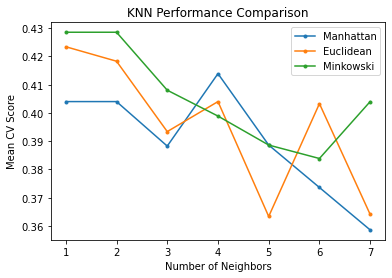

In [44]:
for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['mean_recall'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

In [45]:
clf = KNeighborsClassifier(n_neighbors=2, weights='distance', p=5)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print('Confusion matrix: \n', cm)
print('Accuracy:', clf.score(X_test, y_test))
print("Recall:", recall_score(y_test, predicted))
print('Classification report: \n', classification_report(y_test, predicted))

Confusion matrix: 
 [[46 15]
 [23  6]]
Accuracy: 0.5777777777777777
Recall: 0.20689655172413793
Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.75      0.71        61
           1       0.29      0.21      0.24        29

    accuracy                           0.58        90
   macro avg       0.48      0.48      0.47        90
weighted avg       0.54      0.58      0.56        90



## 2. Decision Tree Classifier

### Fitting a Decision Tree Classifier with default parameters

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state=0)

In [48]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print("Accuracy:", dt_classifier.score(X_test, y_test))
print("Recall:", recall_score(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[44 17]
 [17 12]]
Accuracy: 0.6222222222222222
Recall: 0.41379310344827586
Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        61
           1       0.41      0.41      0.41        29

    accuracy                           0.62        90
   macro avg       0.57      0.57      0.57        90
weighted avg       0.62      0.62      0.62        90



In [49]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)
ls =[]
for k, (train_index, test_index) in enumerate(rskf.split(X,y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    ls.append(recall_score(y_test, y_pred))
    print("[fold {0}] recall score: {1:.5f}".format(k, recall_score(y_test, y_pred)))    
print("Mean cross-validation recall score after stratified \n5-fold cross-validation with 3 repetitions:", np.mean(ls).round(2))

[fold 0] recall score: 0.45000
[fold 1] recall score: 0.63158
[fold 2] recall score: 0.31579
[fold 3] recall score: 0.52632
[fold 4] recall score: 0.47368
[fold 5] recall score: 0.60000
[fold 6] recall score: 0.42105
[fold 7] recall score: 0.63158
[fold 8] recall score: 0.36842
[fold 9] recall score: 0.47368
[fold 10] recall score: 0.60000
[fold 11] recall score: 0.68421
[fold 12] recall score: 0.57895
[fold 13] recall score: 0.36842
[fold 14] recall score: 0.47368
Mean cross-validation recall score after stratified 
5-fold cross-validation with 3 repetitions: 0.51


#### Visualise Decision Tree classifier with default parameters

In [50]:
feature_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']
target_names = ['Censored', 'Dead']
export_graphviz(dt_classifier, 'heart1.dot', feature_names = feature_cols, 
                class_names = target_names, filled = True, 
                rounded = True, special_characters = True)

### DT Parameter Tuning and Cross validation

In [51]:
df_classifier = DecisionTreeClassifier(random_state=8)

params_DT = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3, 4]}

perf_metric = 'recall'

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring=perf_metric)

gs_DT.fit(X, y);

Fitting 15 folds for each of 24 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    2.1s finished


In [52]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['mean_recall'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['max_depth', 'min_samples_split', 'mean_recall'], dtype='object')

In [53]:
results_DT

,max_depth,min_samples_split,mean_recall
0,1,2,0.374211
1,1,3,0.374211
2,1,4,0.374211
3,2,2,0.517719
4,2,3,0.517719
5,2,4,0.517719
6,3,2,0.492807
7,3,3,0.492807
8,3,4,0.492807
9,4,2,0.451404


No handles with labels found to put in legend.


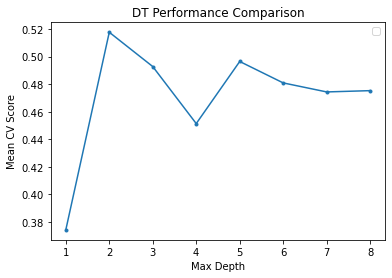

In [54]:
temp = results_DT
temp_average = temp.groupby('max_depth').agg({'mean_recall': 'mean'})
plt.plot(temp_average, marker = '.')
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

### Fitting Decision Tree classifier with tuned parameter 

In [55]:
dt_classifier = DecisionTreeClassifier(max_depth=2, min_samples_split = 2)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print("Accuracy:", dt_classifier.score(X_test, y_test))
print("Recall:", recall_score(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[36  4]
 [ 9 10]]
Accuracy: 0.7796610169491526
Recall: 0.5263157894736842
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        40
           1       0.71      0.53      0.61        19

    accuracy                           0.78        59
   macro avg       0.76      0.71      0.73        59
weighted avg       0.77      0.78      0.77        59



#### Visualise Decision Tree classifier with tuned parameter 

In [56]:
feature_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']
target_names = ['Censored', 'Dead']
from sklearn.tree import export_graphviz
export_graphviz(dt_classifier, 'heart2.dot', feature_names = feature_cols, 
                class_names = target_names, filled = True, 
                rounded = True, special_characters = True)